In [215]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [217]:
df = pd.read_csv("AQI_final.csv")

In [219]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2019-05-15,37.55,122.41,15.08,85.12,58.72,19.441039,15.08,163.01,48.23,16.44,85.54,14.19,281.0,Poor
1,Ahmedabad,2019-05-16,33.97,116.32,14.67,79.71,55.61,19.441039,14.67,91.26,51.86,15.55,83.89,13.15,330.0,Very Poor
2,Ahmedabad,2019-05-17,35.48,130.07,18.02,77.61,58.41,19.441039,18.02,98.35,38.99,15.88,83.83,13.34,356.0,Very Poor
3,Ahmedabad,2019-05-18,34.11,138.31,13.27,75.23,51.83,19.441039,13.27,88.66,42.22,15.93,82.73,13.44,359.0,Very Poor
4,Ahmedabad,2019-05-21,24.60,103.88,11.03,81.24,52.21,19.441039,11.03,80.74,46.65,15.31,82.95,11.66,321.0,Very Poor


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6951 entries, 0 to 6950
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        6951 non-null   object 
 1   Date        6951 non-null   object 
 2   PM2.5       6951 non-null   float64
 3   PM10        6951 non-null   float64
 4   NO          6951 non-null   float64
 5   NO2         6951 non-null   float64
 6   NOx         6951 non-null   float64
 7   NH3         6951 non-null   float64
 8   CO          6951 non-null   float64
 9   SO2         6951 non-null   float64
 10  O3          6951 non-null   float64
 11  Benzene     6951 non-null   float64
 12  Toluene     6951 non-null   float64
 13  Xylene      6951 non-null   float64
 14  AQI         6951 non-null   float64
 15  AQI_Bucket  6951 non-null   object 
dtypes: float64(13), object(3)
memory usage: 869.0+ KB


In [223]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000
mean,55.696690,114.354914,15.944917,31.220847,31.444286,19.595780,1.366051,12.984690,35.613314,3.673218,10.511325,2.850434,137.947202
std,41.399612,69.792905,17.948494,21.489510,25.570405,14.976821,3.157228,14.645473,19.371130,5.038121,13.553700,5.282095,88.289752
min,2.000000,7.800000,0.060000,0.060000,0.000000,0.010000,0.000000,0.710000,1.310000,0.000000,0.000000,0.000000,20.000000
25%,27.800000,65.745000,5.080000,15.110000,14.270000,10.260000,0.490000,6.350000,22.105000,0.930000,2.040000,0.320000,79.000000
50%,45.660000,100.290000,10.080000,27.170462,24.290000,14.620000,0.740000,9.900000,32.630000,2.390000,5.980000,1.320000,110.000000
75%,69.285000,141.970000,18.670000,42.205000,38.815000,25.670000,1.100000,14.420000,44.660000,4.590000,13.120000,3.260000,162.000000
max,525.090000,390.100000,159.220000,277.310000,224.090000,166.700000,36.560000,186.080000,162.430000,64.440000,256.090000,137.450000,497.000000


In [225]:
if df.isnull().sum().any():
    df.fillna(data.median(), inplace=True)  # Replace missing values with the median

# Drop irrelevant columns
data_processed = df.drop(columns=["City", "Date", "AQI_Bucket"])

### Data Splitting

In [101]:
features = data_processed.drop(columns=["AQI"])
target = data_processed["AQI"]

In [103]:
target_log = np.log1p(target)

In [228]:
X_train, X_test, y_train, y_test = train_test_split(features, target_log, test_size=0.2, random_state=42)

gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Cross Validation

In [231]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)
cv_r2 = cross_val_score(gb_model, X_train_scaled, y_train, cv=kf, scoring='r2')
cv_predictions = cross_val_predict(gb_model, X_train_scaled, y_train, cv=kf)
cv_mae = mean_absolute_error(y_train, cv_predictions)
cv_rmse = np.sqrt(mean_squared_error(y_train, cv_predictions))

print(f"Cross-validation R²: {cv_r2.mean():.4f}")
print(f"Cross-validation MAE: {cv_mae:.2f}")
print(f"Cross-validation RMSE: {cv_rmse:.2f}")

Cross-validation R²: 0.9180
Cross-validation MAE: 0.12
Cross-validation RMSE: 0.16


In [233]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': uniform(0.01, 0.1),
}
random_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # More iterations for better results
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)
print(f"Best parameters: {random_search.best_params_}")

Best parameters: {'learning_rate': 0.09324426408004217, 'max_depth': 5, 'n_estimators': 200}


### Evaluate Model

In [235]:
final_model = GradientBoostingRegressor(**random_search.best_params_, random_state=42)
final_model.fit(X_train_scaled, y_train)
y_pred_test = final_model.predict(X_test_scaled)

# Evaluate on the test set
y_pred_test_original = np.expm1(y_pred_test)
r2 = r2_score(np.expm1(y_test), y_pred_test_original)
mae = mean_absolute_error(np.expm1(y_test), y_pred_test_original)
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), y_pred_test_original))

print(f"Test Set R²: {r2:.4f}")
print(f"Test Set MAE: {mae:.2f}")
print(f"Test Set RMSE: {rmse:.2f}")

Test Set R²: 0.9388
Test Set MAE: 14.10
Test Set RMSE: 22.20


### Visualization

### 1. Scatter Plot: Actual vs Predicted

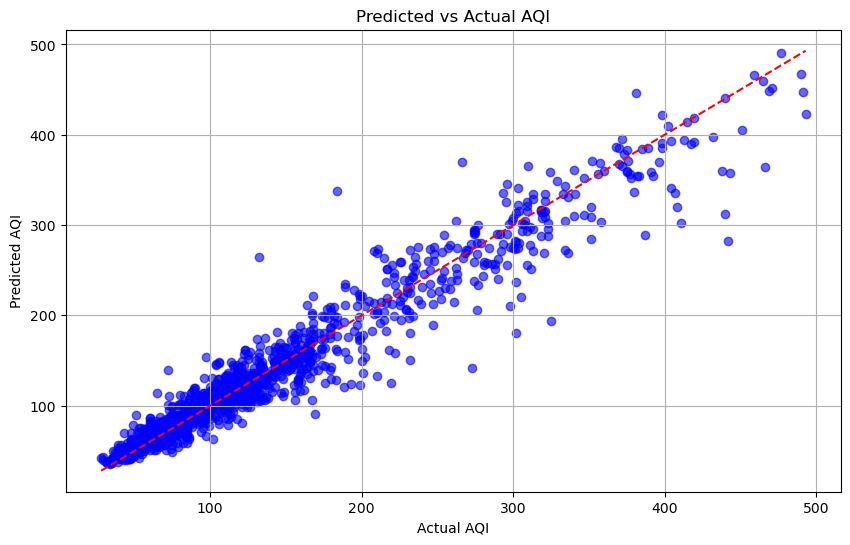

In [256]:
y_pred_test_original = np.expm1(final_model.predict(X_test_scaled))  # Inverse log transformation

plt.figure(figsize=(10, 6))
plt.scatter(np.expm1(y_test), y_pred_test_original, alpha=0.6, color='blue') 
plt.plot([np.min(np.expm1(y_test)), np.max(np.expm1(y_test))], 
         [np.min(np.expm1(y_test)), np.max(np.expm1(y_test))], color='red', linestyle='--')  # Line for perfect predictions
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.title('Predicted vs Actual AQI')
plt.show()


### 2. Residual Plot or Histogram of Residuals

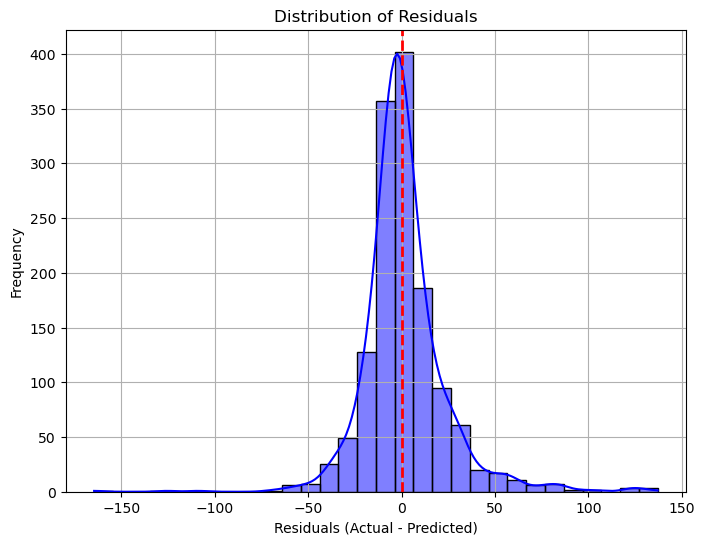

In [175]:
residuals = y_test_original - y_pred_test_original

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid(True)
plt.show()

### 3. Cross-validation R² scores as bar plot

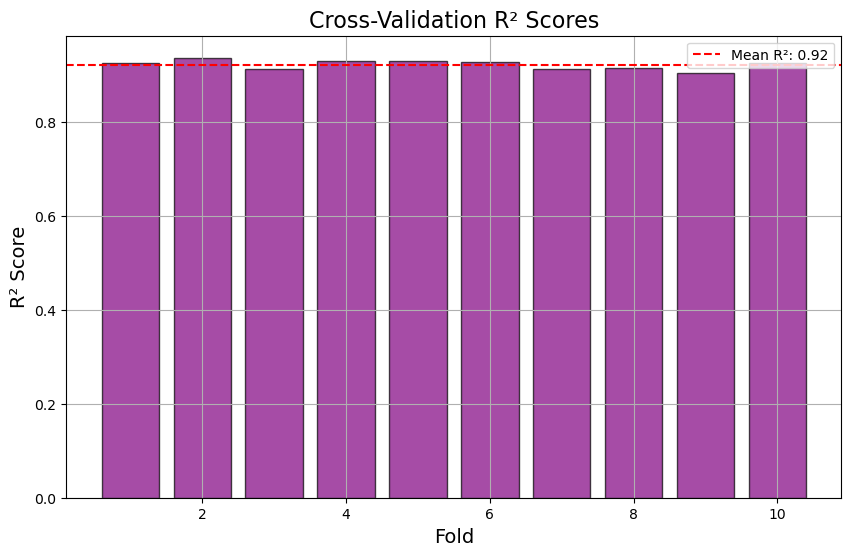

In [191]:
cv_r2_scores = cross_val_score(gb_model, features, target_log, cv=kf, scoring='r2')

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(cv_r2_scores) + 1), cv_r2_scores, color='purple', alpha=0.7, edgecolor='k')
plt.axhline(y=cv_r2_scores.mean(), color='red', linestyle='--', label=f"Mean R²: {cv_r2_scores.mean():.2f}")
plt.title("Cross-Validation R² Scores", fontsize=16)
plt.xlabel("Fold", fontsize=14)
plt.ylabel("R² Score", fontsize=14)
plt.legend()
plt.grid()
plt.show()

### 4.  KDE Distribution Plot

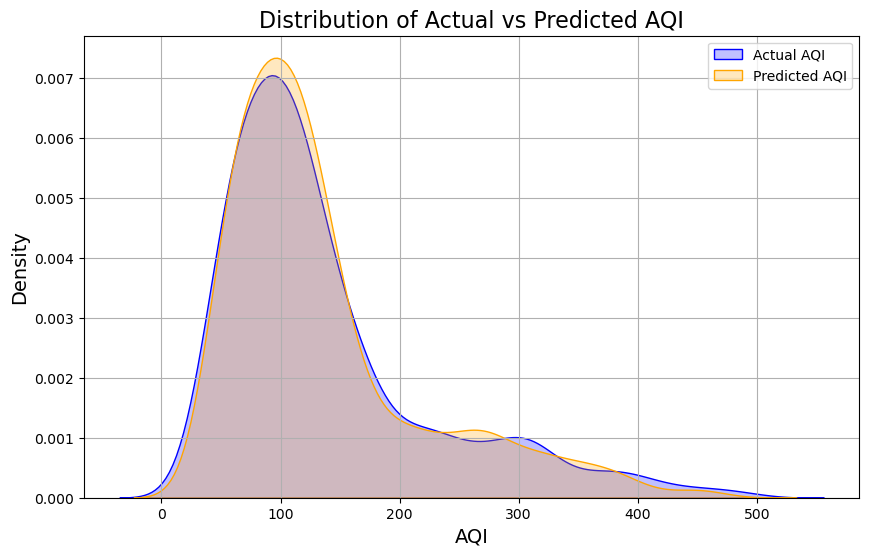

In [193]:
actual = np.expm1(y_test)  # Transform back to original scale if necessary
predicted = y_pred_test_original  # Predictions from the Gradient Boosting model

plt.figure(figsize=(10, 6))
sns.kdeplot(actual, label='Actual AQI', fill=True, color='blue')
sns.kdeplot(predicted, label='Predicted AQI', fill=True, color='orange')
plt.title("Distribution of Actual vs Predicted AQI", fontsize=16)
plt.xlabel("AQI", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend()
plt.grid()
plt.show()

### 6. Grouped Bar Plot of Cross-Validation Scores

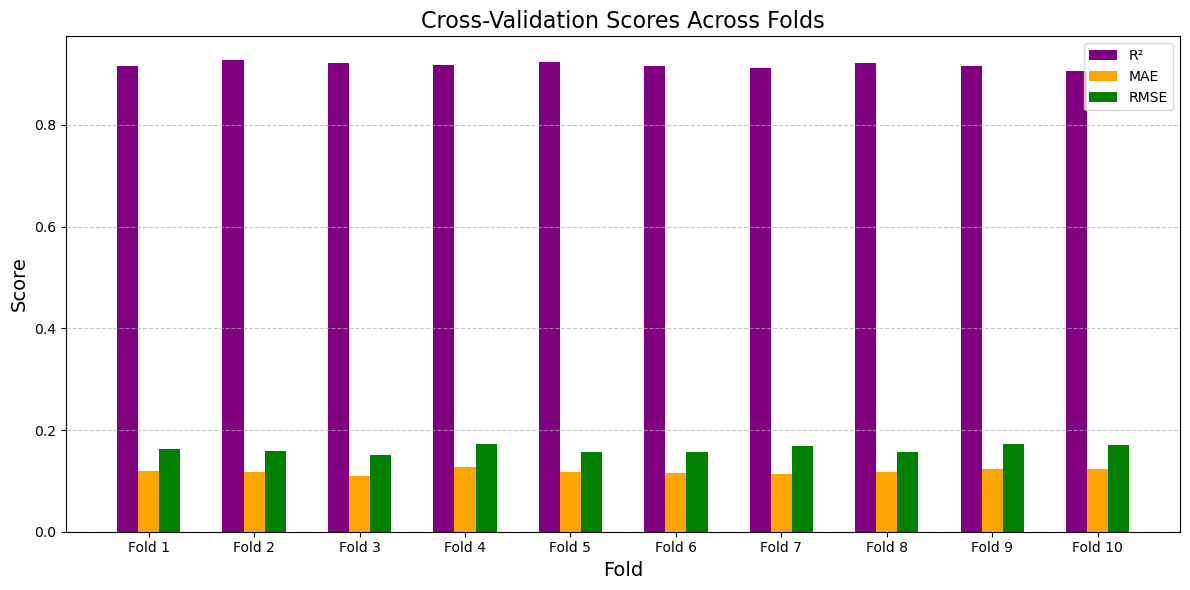

In [187]:
cv_mae = -cv_mae
cv_rmse = -cv_rmse

# Prepare data for plotting
scores = {
    "R²": cv_r2,
    "MAE": cv_mae,
    "RMSE": cv_rmse
}

# Create the bar plot
folds = range(1, len(cv_r2) + 1)
x = np.arange(len(folds))  # X-axis positions for groups
width = 0.2  # Width of each bar

plt.figure(figsize=(12, 6))

# Plot bars for each metric
plt.bar(x - width, scores["R²"], width=width, label="R²", color='purple')
plt.bar(x, scores["MAE"], width=width, label="MAE", color='orange')
plt.bar(x + width, scores["RMSE"], width=width, label="RMSE", color='green')

# Customizing the plot
plt.title("Cross-Validation Scores Across Folds", fontsize=16)
plt.xlabel("Fold", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.xticks(x, labels=[f"Fold {i}" for i in folds])
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [185]:
import pandas as pd

# Inverse log transformation to get the original scale predictions
y_pred_test_original = np.expm1(final_model.predict(X_test_scaled))

# Create a DataFrame with Actual and Predicted values
results_df = pd.DataFrame({
    'Actual AQI': np.expm1(y_test),  # Inverse log transformation to original scale
    'Predicted AQI': y_pred_test_original
})

# Display the first few rows of the table
print(results_df.head())

# If you want to save it as a CSV file for later use
results_df.to_csv('predictions_vs_actuals.csv', index=False)


      Actual AQI  Predicted AQI
6024       159.0     120.602219
4366       124.0     114.988084
4587        73.0      74.611102
3946       215.0     254.618086
5981       166.0     178.165765
